# Импортирую нужные библиотеки

In [4]:
import pandas as pd, numpy

In [5]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [6]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


информация о данных в датасете:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


найду пропуски

In [9]:
df.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [10]:
df['Sleep Disorder'].fillna('Нет сведений', inplace=True)

/tmp/ipython-input-823163609.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('Нет сведений', inplace=True)


In [11]:
duplicates = df.duplicated()
print(f"Количество дублирующихся строк: {duplicates.sum()}")

Количество дублирующихся строк: 0


тк дубликатов не нашлось, удалять нечего.

# Описание:

In [12]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


уникальные значения:

In [13]:
for column in df.columns:
    print('Column:', column)
    print('Number of unique values:', df[column].nunique())
    print()

Column: Person ID
Number of unique values: 374

Column: Gender
Number of unique values: 2

Column: Age
Number of unique values: 31

Column: Occupation
Number of unique values: 11

Column: Sleep Duration
Number of unique values: 27

Column: Quality of Sleep
Number of unique values: 6

Column: Physical Activity Level
Number of unique values: 16

Column: Stress Level
Number of unique values: 6

Column: BMI Category
Number of unique values: 4

Column: Blood Pressure
Number of unique values: 25

Column: Heart Rate
Number of unique values: 19

Column: Daily Steps
Number of unique values: 20

Column: Sleep Disorder
Number of unique values: 3



In [14]:
correlation = df.select_dtypes(include=['number']).corr()
print("Корреляционная матрица:\n", correlation)

Корреляционная матрица:
                          Person ID       Age  Sleep Duration  \
Person ID                 1.000000  0.990516        0.296305   
Age                       0.990516  1.000000        0.344709   
Sleep Duration            0.296305  0.344709        1.000000   
Quality of Sleep          0.431612  0.473734        0.883213   
Physical Activity Level   0.149882  0.178993        0.212360   
Stress Level             -0.394287 -0.422344       -0.811023   
Heart Rate               -0.225467 -0.225606       -0.516455   
Daily Steps               0.043844  0.057973       -0.039533   

                         Quality of Sleep  Physical Activity Level  \
Person ID                        0.431612                 0.149882   
Age                              0.473734                 0.178993   
Sleep Duration                   0.883213                 0.212360   
Quality of Sleep                 1.000000                 0.192896   
Physical Activity Level          0.192896       

# Визуализация данных:

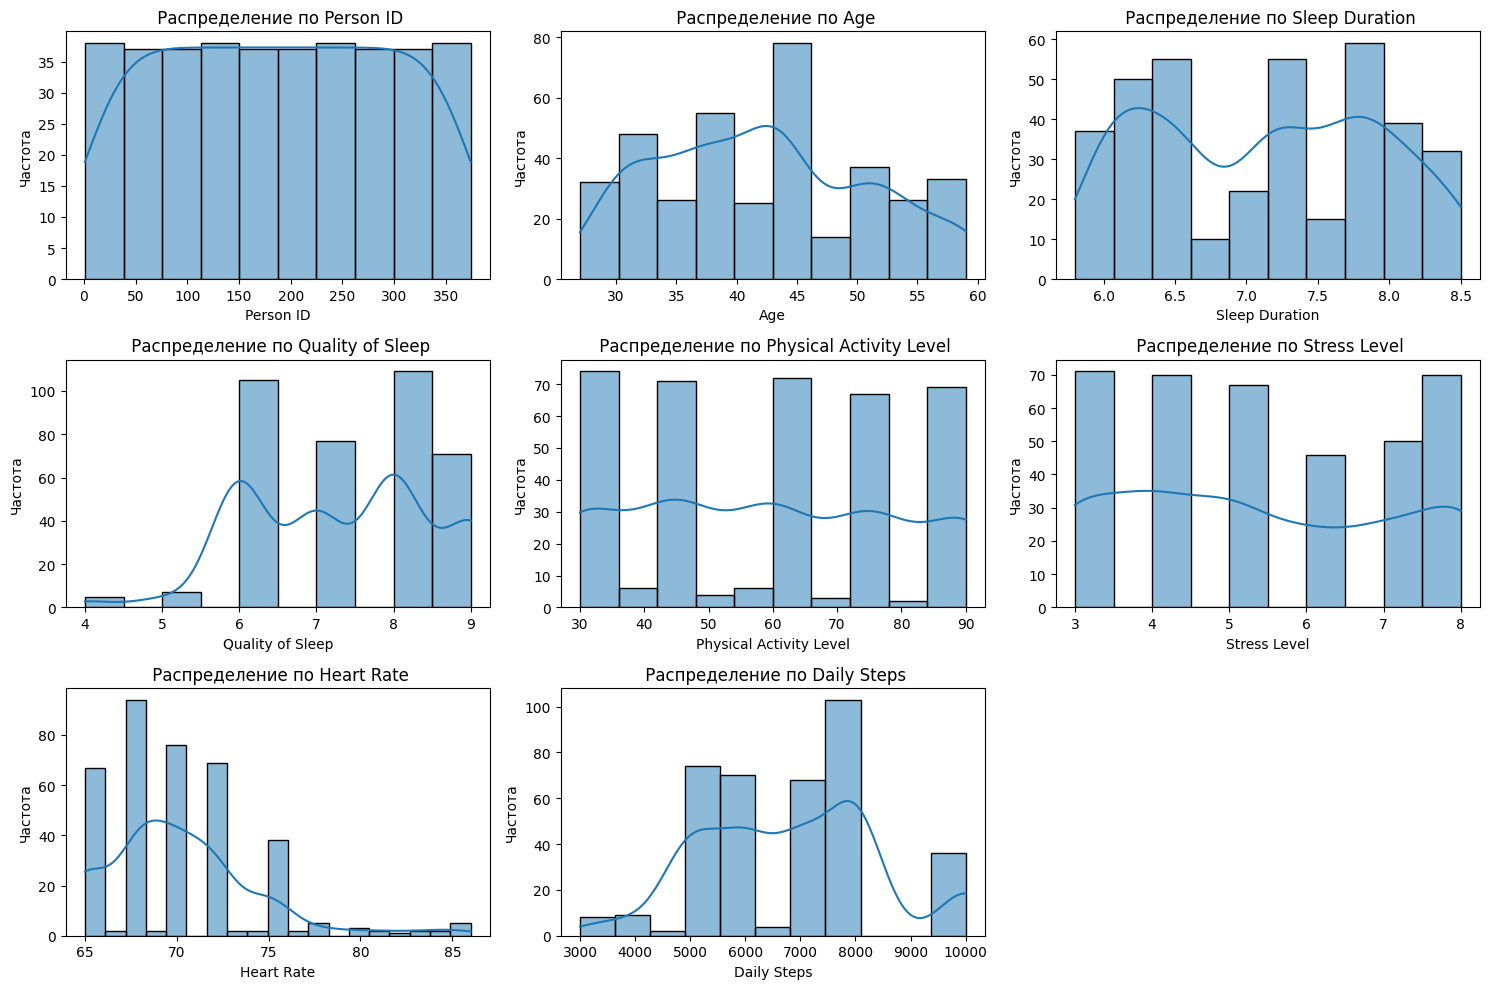

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f' Распределение по {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

2-й график (линейный)

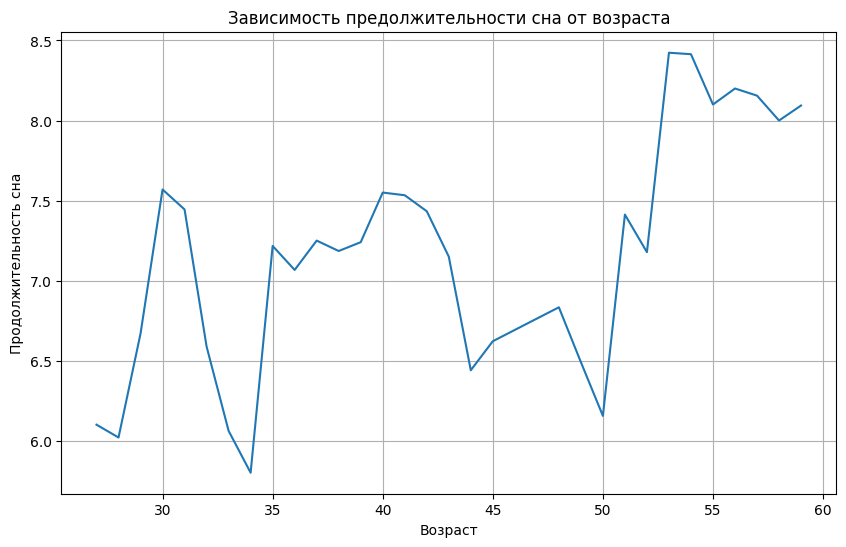

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Sleep Duration', data=df, errorbar=None)
plt.title('Зависимость предолжительности сна от возраста')
plt.xlabel('Возраст')
plt.ylabel('Продолжительность сна')
plt.grid(True)
plt.show()

3-й график: столбцаые диаграммы

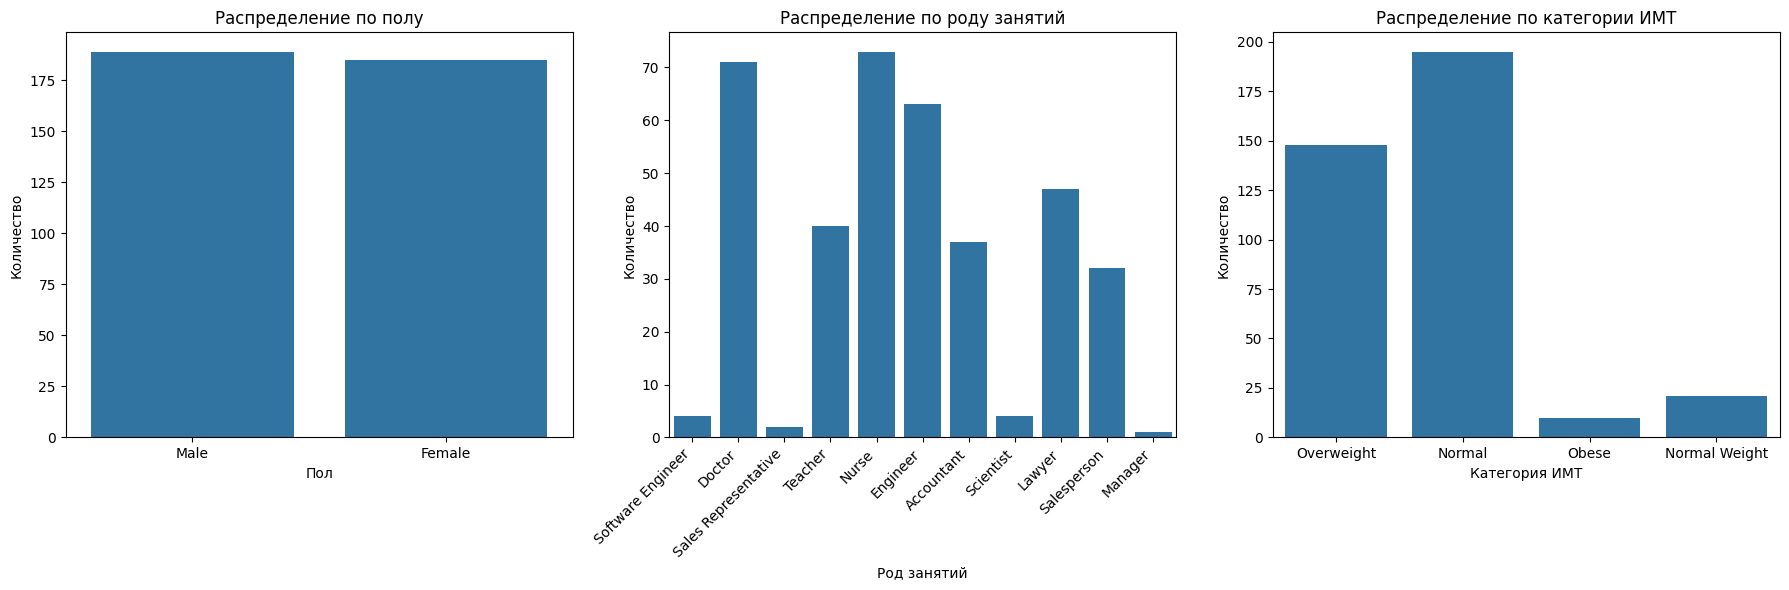

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Gender')
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Occupation')
plt.title('Распределение по роду занятий')
plt.xlabel('Род занятий')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='BMI Category')
plt.title('Распределение по категории ИМТ')
plt.xlabel('Категория ИМТ')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

4-й график

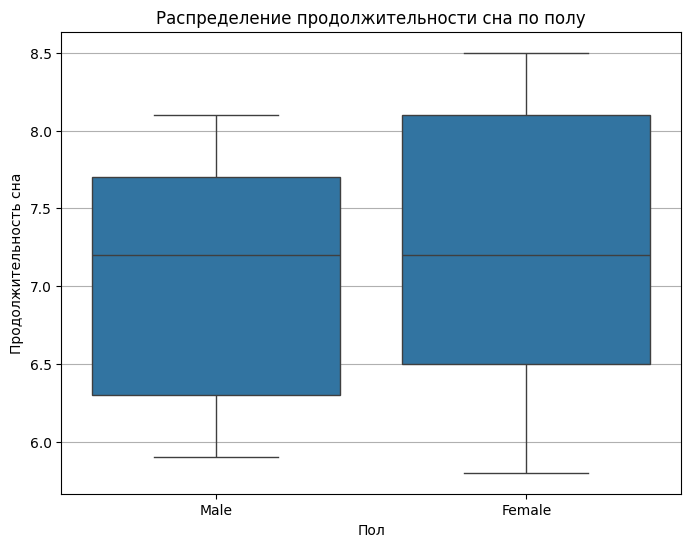

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.title('Распределение продолжительности сна по полу')
plt.xlabel('Пол')
plt.ylabel('Продолжительность сна')
plt.grid(axis='y')
plt.show()

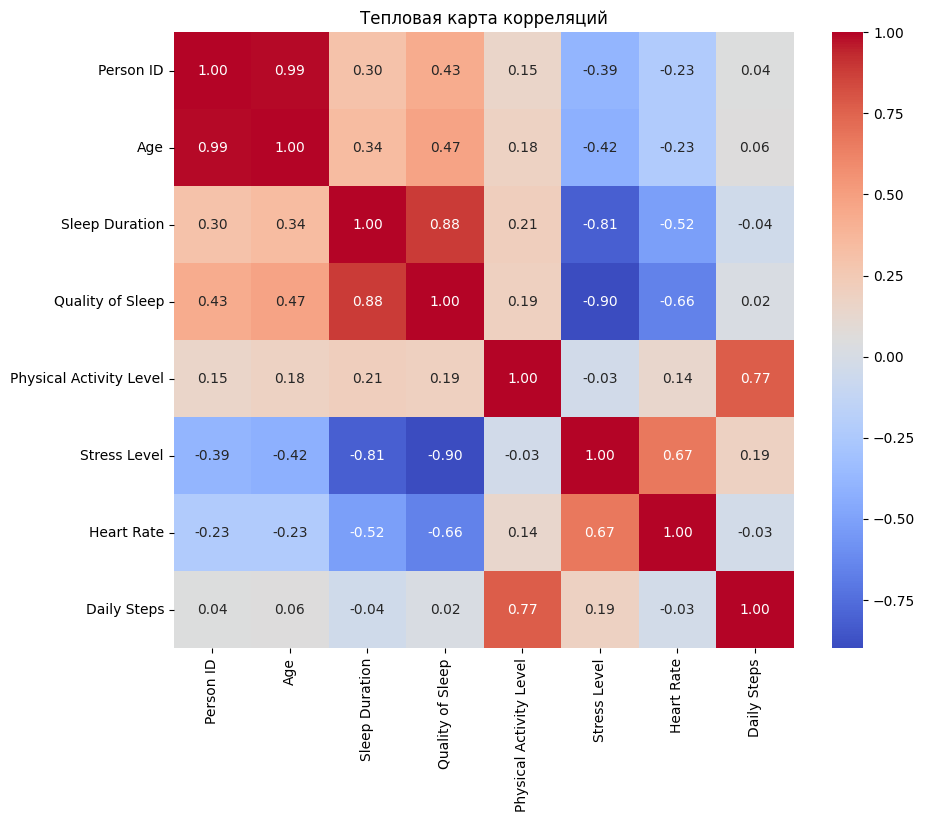

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций')
plt.show()

In [20]:
top_3_occupations = df['Occupation'].value_counts().nlargest(3).index

df_grouped = df[df['Occupation'].isin(top_3_occupations)]

print("Медианные значения по группам (топ-3 профессий):\n")
print(df_grouped.groupby('Occupation').median(numeric_only=True))

print("\nСредние значения по группам (топ-3 профессий):\n")
print(df_grouped.groupby('Occupation').mean(numeric_only=True))

print("\nСуммы по группам (топ-3 профессий):\n")
print(df_grouped.groupby('Occupation').sum(numeric_only=True))

Медианные значения по группам (топ-3 профессий):

            Person ID   Age  Sleep Duration  Quality of Sleep  \
Occupation                                                      
Doctor           46.0  31.0             7.6               7.0   
Engineer        280.0  50.0             8.3               9.0   
Nurse           303.0  51.0             6.5               6.0   

            Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
Occupation                                                                  
Doctor                         75.0           6.0        70.0       8000.0  
Engineer                       30.0           3.0        65.0       5000.0  
Nurse                          75.0           6.0        75.0       7000.0  

Средние значения по группам (топ-3 профессий):

             Person ID        Age  Sleep Duration  Quality of Sleep  \
Occupation                                                            
Doctor       64.056338  32.676056        6.97042